In [1]:
import sys
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split

from chemicalchecker import ChemicalChecker 
from chemicalchecker.core import DataSignature
from chemicalchecker.util import Config

ChemicalChecker.set_verbosity('DEBUG')
%matplotlib inline

2022-07-22 16:26:21,004 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
data_path = "/aloy/web_checker/package_cc/2021_07/sign_links"
local_cc_dir = "/aloy/home/mlocatelli/code/local_cc_complete/"
# Our local cc instance
cc_local = ChemicalChecker(local_cc_dir, custom_data_path=data_path)

2022-07-22 16:26:21,022 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-22 16:26:21,297 chemicalchecker.core.chemcheck.ChemicalChecker [INFO    ] CC root directory exists: ignoring 'custom_data_path'.


In [18]:
# read in chembl antibiotics for benchmark
chembl_antibiotics_df = pd.read_csv('../data/chembl_antobiotics_inchikeys_df.csv')

In [3]:
dataset = 'M2.train_test_split'

In [4]:
# Load the raw data (z-scores)
# Rows: inchikeys
# Columns: normalized E. coli metabolite intensity

inputFile = "../data/campos_extended_matrix_inchikeys.csv"

df = pd.read_csv(inputFile, index_col = 0)

In [7]:
df

,metabolite_1,metabolite_2,metabolite_3,metabolite_4,metabolite_5,metabolite_6,metabolite_7,metabolite_8,metabolite_9,metabolite_10,...,metabolite_960,metabolite_961,metabolite_962,metabolite_963,metabolite_964,metabolite_965,metabolite_966,metabolite_967,metabolite_968,metabolite_969
AADCDMQTJNYOSS-LBPRGKRZSA-N,0.125893,-0.254860,-0.879626,1.140150,0.041542,0.820941,-0.054836,-1.579578,-0.498644,0.759653,...,-0.946303,0.527036,-0.826519,0.312930,-0.344269,-0.606251,-0.066832,-0.044559,-0.858687,-0.911569
AAFNEINEQRQMTF-LREBCSMRSA-N,-1.194746,0.143042,0.067488,-0.299175,-1.052552,-1.207495,2.176115,-0.563386,0.036507,0.781593,...,-0.758251,0.737181,-1.668036,-1.869166,-0.118406,-0.659779,0.133741,-2.006336,-0.110296,0.245076
ABTXGJFUQRCPNH-UHFFFAOYSA-N,0.188807,0.133726,0.343841,0.675060,0.233839,-0.242988,-0.157781,1.084959,0.154835,-0.130628,...,-0.063158,-0.159939,-0.096345,0.369073,-0.254000,0.277707,-0.485726,-0.044583,0.023789,0.061695
ACGDKVXYNVEAGU-UHFFFAOYSA-N,0.956394,-0.723133,0.202180,0.620544,2.107298,0.331794,1.822242,0.687388,0.181422,0.783386,...,0.387567,-0.156143,-0.818329,-0.639664,-1.096123,0.374778,0.062416,-0.079797,0.449327,-0.220253
ACGUYXCXAPNIKK-UHFFFAOYSA-N,-0.181969,-0.539771,-2.142445,-1.544044,-0.126133,-0.437213,0.351800,-1.498574,-0.198774,0.274755,...,0.634635,-1.080523,-0.393437,-0.337262,0.845454,-0.282612,-0.190942,-1.117762,-1.042433,0.443701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXKXJHAOUFHNAS-FVGYRXGTSA-N,0.245625,-0.189853,0.046320,0.320218,-0.021597,0.592178,0.999009,0.156916,-0.416755,-0.415147,...,0.211907,0.295118,0.454375,0.471495,0.099019,-0.064562,-0.220591,1.728176,0.856480,-1.969440
ZXNRTKGTQJPIJK-UHFFFAOYSA-N,0.452195,0.107178,0.079858,0.484860,0.032294,-0.026142,0.905255,-1.277152,-0.156753,-0.835550,...,-0.056455,0.174774,-0.988316,0.027194,0.097843,0.025724,0.499597,0.363585,0.636862,-0.157763
ZYSCHNVPUOSLNC-BTJKTKAUSA-N,-0.050759,-0.127447,1.556915,1.616359,1.600235,0.391248,1.622969,1.571186,0.040840,-0.547748,...,1.035546,-0.311631,-0.398663,-1.758119,1.378177,0.192307,-0.145598,-0.074433,0.106007,1.078514
ZZORFUFYDOWNEF-UHFFFAOYSA-N,0.200499,0.137398,0.138441,-0.598252,-0.309113,-0.392458,-0.244352,-0.076327,-0.391745,-0.280281,...,-0.493240,-0.333704,1.917683,-0.912334,0.278607,0.079143,-0.778008,-1.254127,-0.009660,-0.184820


In [5]:
df.shape

(1309, 969)

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


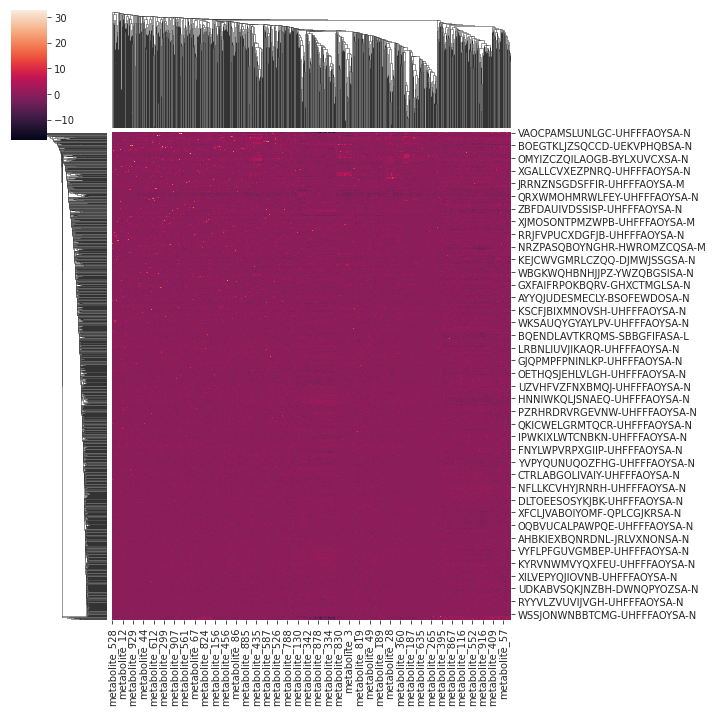

In [8]:
g = sns.clustermap(df)

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

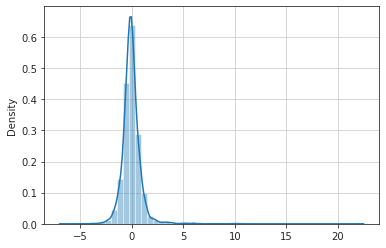

In [12]:
v = df.values.ravel()
sns.distplot(np.random.choice(v, 10000))

In [21]:
np.percentile(v, 90)

0.833769017053486

In [21]:
antibiotic_class_df = pd.read_csv("../data/antibiotic_class_df.csv", index_col="InChiKey")

In [13]:
antibiotic_class_df

,compound_name,drug_class,antibiotic_class
InChiKey,,,
ZWBTYMGEBZUQTK-PVLSIAFMSA-N,Rifabutin,antibiotics,DNA
PTNZGHXUZDHMIQ-CVHRZJFOSA-N,Doxycycline hydrochloride,antibiotics,ribosome
QYAPHLRPFNSDNH-MRFRVZCGSA-N,Chlortetracycline hydrochloride,antibiotics,ribosome
HIUQPJJYKJHGMT-UHFFFAOYSA-N,Tosufloxacin hydrochloride,antibiotics,gyrase
WIIZWVCIJKGZOK-UHFFFAOYSA-N,Chloramphenicol,antibiotics,ribosome
...,...,...,...
QOVTVIYTBRHADL-UHFFFAOYSA-N,Clorsulon,vet: antiparasitics,other
GGXQONWGCAQGNA-UUSVNAAPSA-N,Morantel tartrate,vet: antiparasitics,other
WXUQBKOBXREBBX-UHFFFAOYSA-N,Sulfaquinoxaline sodium salt,vet: antiparasitics,other


In [26]:
# Split train and test data
X_train, X_test = train_test_split(df, test_size=0.2, random_state=6)

In [ ]:
antibiotic_class_df[antibiotic_class_df.index.isin(X_test.index)]['antibiotic_class'].tolist()

In [29]:
X_train.to_csv('../data/M2_train_split.csv')

### Signature 0

In [28]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.clear_all()
sign0.fit(X=X_train.values, keys=list(X_train.index), features=list(X_train.columns), do_triplets=False, overwrite=True, sanitize=True, validations=False)

2022-07-13 14:21:00.330494: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-13 14:21:02,452 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-13 14:21:02,510 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign0
2022-07-13 14:21:02,545 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign0
2022-07-13 14:21:02,558 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-13 14:21:02,559 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/ho

In [30]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.shape

2022-07-13 14:29:56,758 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0


(1047, 969)

2022-07-13 14:30:04,726 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-13 14:30:04,728 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-13 14:30:04,850 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-13 14:30:04,851 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-13 14:30:04,873 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=1047)
2022-07-13 14:30:04,873 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-13 14:30:05,076 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-13 

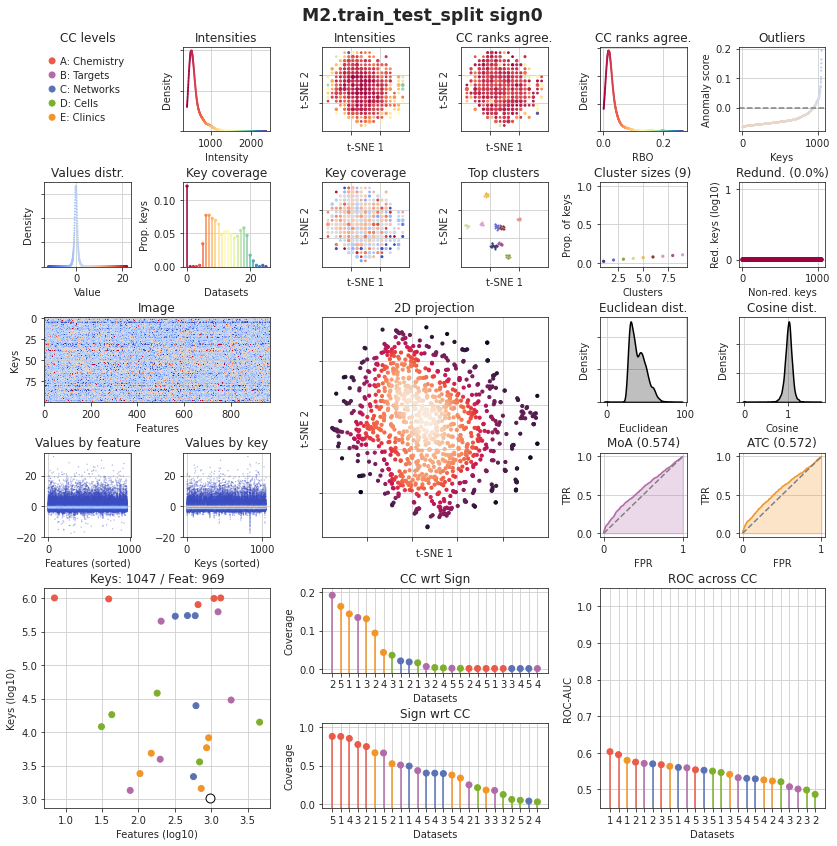

In [31]:
# Sign0 diagnostic plots
sign0 = cc_local.signature(dataset, 'sign0')
diag0 = sign0.diagnosis(ref_cctype='sign0')
diag0.canvas_medium()

### Signature 1

In [32]:
sign0 = cc_local.signature(dataset, 'sign0')
sign1 = cc_local.signature(dataset, 'sign1')
sign1.clear_all()

sign1.fit(sign0, overwrite=True, validations=False, metric_learning=False)

2022-07-13 14:39:42,403 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-13 14:39:42,407 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1
2022-07-13 14:39:42,429 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign1
2022-07-13 14:39:42,446 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign1
2022-07-13 14:39:42,453 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1
2022-07-13 14:39:42,454 chemicalchecker.core.signature_base.BaseSignature

In [22]:
sign1 = cc_local.signature(dataset, 'sign1')
sign1.shape

2022-07-14 12:26:39.649625: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-14 12:26:45,830 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1


(1047, 350)

In [34]:
sign1_ref = cc_local.get_signature('sign1', 'reference', dataset)
sign1_ref.shape

2022-07-13 16:08:18,032 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign1


(1047, 350)

2022-07-13 16:08:25,651 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1
2022-07-13 16:08:25,653 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-13 16:08:26,004 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-13 16:08:26,006 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-13 16:08:26,062 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=1047)
2022-07-13 16:08:26,063 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-13 16:08:26,173 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-13 

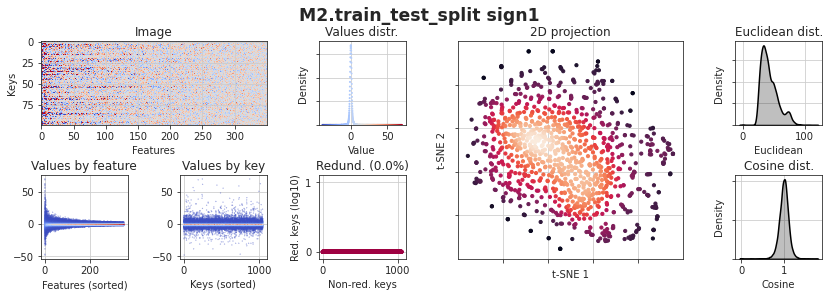

In [35]:
# Sign1 diagnostic plots
sign1 = cc_local.signature(dataset, 'sign1')
diag1 = sign1.diagnosis(ref_cctype='sign0')
diag1.canvas_small()

#### Signature 1 neighbors

In [36]:
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
neig1.clear_all()
neig1.fit(sign1)

2022-07-13 16:08:55,136 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1
2022-07-13 16:08:55,138 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/neig1
2022-07-13 16:08:55,196 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/neig1
2022-07-13 16:08:55,196 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/neig1/neig.h5
2022-07-13 16:08:55,210 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/neig1
2022-07-13 16:08:55,229 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/loca

### Signature 2

In [37]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.clear_all()
# TODO: check here if fit has to run on reference
sign2_ref = cc_local.get_signature('sign2','reference',dataset)
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
sign2_ref.fit(sign1,neig1, oos_predictor=False, overwrite=True, validations=False)

2022-07-13 16:09:17,121 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2
2022-07-13 16:09:17,127 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign2
2022-07-13 16:09:17,163 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign2
2022-07-13 16:09:17,172 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2
2022-07-13 16:09:17,173 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2
2022-07-13 16:09:17,183 chemicalchecker.core.signature_base.BaseSignature

In [38]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.shape

2022-07-13 16:20:18,621 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2


(1047, 128)

2022-07-13 16:20:26,471 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2
2022-07-13 16:20:26,472 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-13 16:20:26,611 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-13 16:20:26,614 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-13 16:20:26,625 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=1047)
2022-07-13 16:20:26,626 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-13 16:20:26,652 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-13 

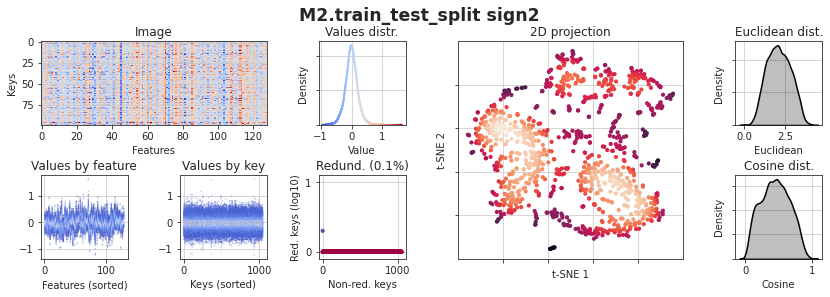

In [39]:
sign2 = cc_local.signature(dataset, 'sign2')
diag2 = sign2.diagnosis(ref_cctype='sign0')
diag2.canvas_small()

2022-07-13 16:51:06,937 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-13 16:51:07,160 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-13 16:51:09,486 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-13 16:51:10,351 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1047 rows from dataset V
2022-07-13 16:51:11,331 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1047 rows from dataset V


<AxesSubplot:title={'center':'AUROC (0.865)'}, xlabel='FPR', ylabel='TPR'>

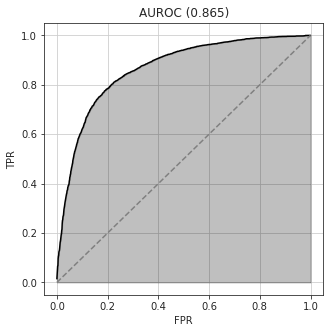

In [40]:
diag2.roc(dataset, 'sign0', plot=True, save=False)

### Signature 3

In [23]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-14 12:27:29,162 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign3
2022-07-14 12:27:29,177 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1
2022-07-14 12:27:29,182 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign1
2022-07-14 12:27:29,204 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split/sign1
2022-07-14 12:27:29,221 chemicalchecker.core.sign1.sign1 [DEBUG   ] Reading triplets
2022-07-14 12:27:29,221 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.tr

In [24]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-14 12:28:04,950 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-14 12:28:04,975 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-14 12:28:05,011 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-14 12:28:05,105 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-14 12:28:05,129 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-14 12:28:05,149 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [25]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-14 12:28:19,603 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign2
2022-07-14 12:28:19,605 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign1


In [26]:
sign3.fit_hpc(sign2_list, sign2_self, sign2_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-14 12:28:34,661 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-14 12:28:34,661 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-14 12:28:34,691 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-14 12:28:34,692 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-14 12:28:35,450 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-14 12:28:35,451 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_qt6uq0a4/job-sign3_fit_hpc.py.sh...
2022-07-14 12:28:35,469 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_qt6uq0a4/job-sign3_fit_hpc.py.sh
2022-07-14 12:28:37,822 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766947


2022-07-19 09:22:22.085908: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-19 09:22:26,838 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign3
2022-07-19 09:22:26,882 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-19 09:22:27,004 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-19 09:22:27,006 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-19 09:22:29,384 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign0
2022-07-19 09:22:33,331 chemicalchecker.core.signature_data.Dat

<AxesSubplot:title={'center':'AUROC (0.624)'}, xlabel='FPR', ylabel='TPR'>

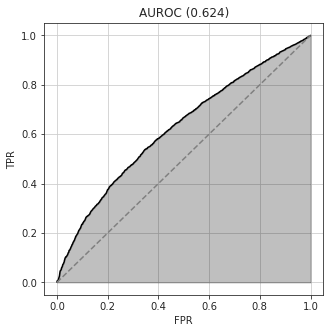

In [6]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

2022-07-19 09:31:04,903 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-19 09:31:04,924 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-19 09:31:04,948 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-19 09:31:05,012 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2022-07-19 09:31:05,034 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2022-07-19 09:31:05,048 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2022-07-19 09:31:05,326 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Values
2022-07-19 09:31:05,343 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Redundancy
2022-07-19 09:31:14,504 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Intensities
2022-07-19 09:31:14,579 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Intensities projection
2022-07-19 09:31:14,601 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Confidences

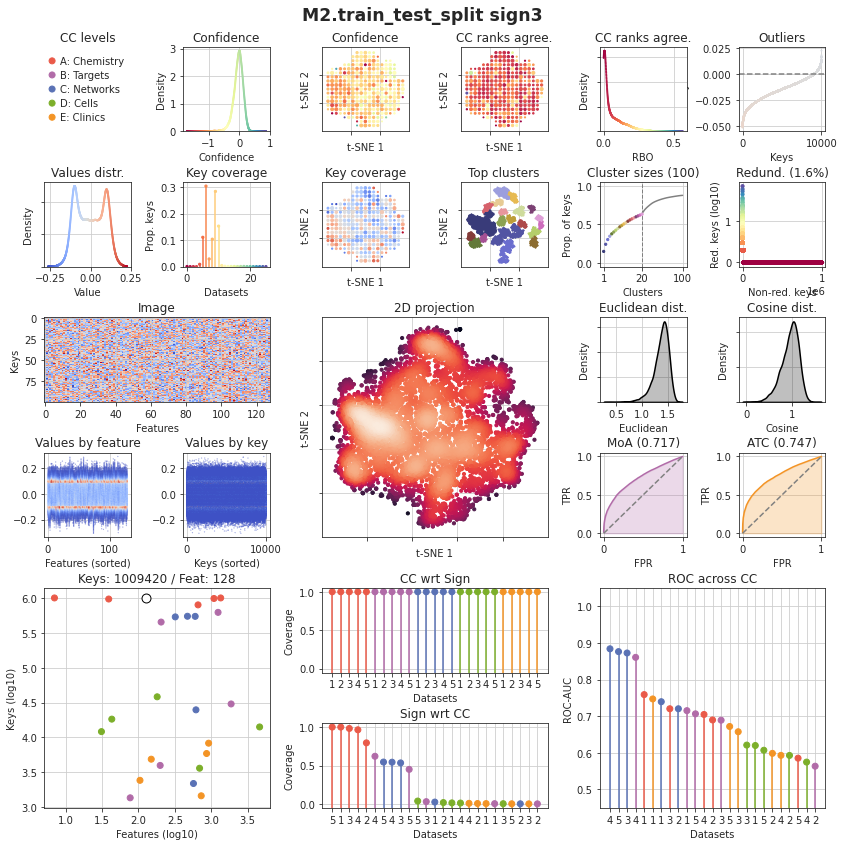

In [7]:
diag3.canvas_medium()

## Manual triplets

In [5]:
dataset = 'M2.train_test_split_manual_split'

In [10]:
s2 = cc_local.signature(dataset,'sign2')

2022-07-15 14:52:34,253 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign2


In [11]:
ink_pos = dict(zip(s2.keys, np.arange(len(s2.keys))))

In [12]:
s2_train_mat = DataSignature('/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split/sign3/models/train.h5')

In [13]:
s2_train_mat.info_h5

{'keys': (1047,), 'x': (1047, 3328)}

In [14]:
triplet_ink_matrix = s2_train_mat.get_h5_dataset('x')

2022-07-15 14:59:12,185 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset x


In [15]:
triplet_ink_matrix

array([[-0.36720774,  0.17660898, -0.21269597, ...,  0.165319  ,
         0.02269   , -0.00723359],
       [-0.00469187,  0.27604282, -0.6291754 , ..., -0.0343419 ,
        -0.014554  ,  0.0660531 ],
       [-0.26162407,  0.42070264, -0.18941875, ...,  0.003156  ,
        -0.0818763 , -0.0712487 ],
       ...,
       [-0.39090768,  0.10366904,  0.22041193, ..., -0.122299  ,
         0.00479281,  0.126262  ],
       [-0.46522662,  0.54266787, -0.4778983 , ...,  0.155323  ,
         0.0857123 , -0.133188  ],
       [-0.2020602 ,  0.13708726, -0.05131074, ..., -0.218465  ,
        -0.174997  ,  0.124479  ]], dtype=float32)

In [16]:
triplet_ink_keys = s2_train_mat.get_h5_dataset('keys')

2022-07-15 14:59:26,988 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset keys


In [17]:
triplet_ink_keys

array(['AAFNEINEQRQMTF-LREBCSMRSA-N', 'ABTXGJFUQRCPNH-UHFFFAOYSA-N',
       'ACGDKVXYNVEAGU-UHFFFAOYSA-N', ..., 'ZYSCHNVPUOSLNC-BTJKTKAUSA-N',
       'ZZORFUFYDOWNEF-UHFFFAOYSA-N', 'ZZUFCTLCJUWOSV-UHFFFAOYSA-N'],
      dtype='<U27')

In [18]:
manual_triplets = pd.read_csv('./m2_train_pca_triplets.tsv.gz', sep='\t')

In [19]:
manual_triplets['anchor'].values

array(['AAFNEINEQRQMTF-LREBCSMRSA-N', 'AAFNEINEQRQMTF-LREBCSMRSA-N',
       'AAFNEINEQRQMTF-LREBCSMRSA-N', ..., 'ZZUFCTLCJUWOSV-UHFFFAOYSA-N',
       'ZZUFCTLCJUWOSV-UHFFFAOYSA-N', 'ZZUFCTLCJUWOSV-UHFFFAOYSA-N'],
      dtype=object)

In [20]:
triplet_array = np.vectorize(ink_pos.get)(manual_triplets.values)

In [21]:
triplet_array

array([[   0,   13,  189],
       [   0,   13,  236],
       [   0,   13,  298],
       ...,
       [1046,  952,  920],
       [1046,  952,  941],
       [1046,  952, 1038]])

### Signature 3

In [22]:
dataset

'M2.train_test_split_manual_split'

In [23]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-15 15:01:09,925 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3
2022-07-15 15:01:09,957 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split_manual_split/sign3
2022-07-15 15:01:10,081 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split_manual_split/sign1
2022-07-15 15:01:10,117 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split_manual_split/sign1
2022-07-15 15:01:10,118 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split_manual_split/sign

In [24]:
from chemicalchecker.util.splitter import NeighborTripletTraintest

In [25]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, 
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3/models/traintest_eval.h5')

[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2022-07-15 15:01:44,895 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3/models/traintest_eval.h5
2022-07-15 15:01:47,186 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3/models/traintest_eval.h5


In [26]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, split_names=['train'], split_fractions=[1.0], suffix='final',
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3/models/traintest_final.h5')

2022-07-15 15:02:10,215 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3/models/traintest_final.h5
2022-07-15 15:02:11,049 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3/models/traintest_final.h5


In [27]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-15 15:02:28,082 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-15 15:02:28,086 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-15 15:02:28,091 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-15 15:02:28,095 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-15 15:02:28,099 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-15 15:02:28,104 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [28]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-15 15:02:37,537 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign2
2022-07-15 15:02:37,538 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign1


In [29]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-15 15:02:47,465 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-15 15:02:47,466 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-15 15:02:47,552 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-15 15:02:47,554 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-15 15:02:48,950 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-15 15:02:48,951 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_0hd5hq3q/job-sign3_fit_hpc.py.sh...
2022-07-15 15:02:48,954 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_0hd5hq3q/job-sign3_fit_hpc.py.sh
2022-07-15 15:02:51,332 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766952


2022-07-21 17:06:02,651 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign3
2022-07-21 17:06:02,694 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-21 17:06:02,888 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-21 17:06:02,904 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign0
2022-07-21 17:06:05,157 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign0
2022-07-21 17:06:09,305 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1047 rows from dataset V
2022-07-21 17:06:10,278 chemicalchecker.core.signat

<AxesSubplot:title={'center':'AUROC (0.832)'}, xlabel='FPR', ylabel='TPR'>

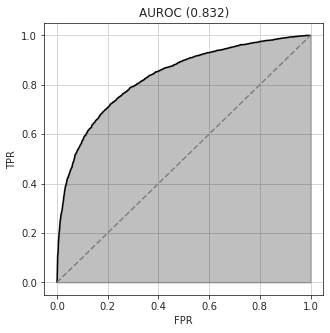

In [8]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

2022-07-18 10:41:55,272 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-18 10:41:55,277 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign0
2022-07-18 10:41:55,279 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign0
2022-07-18 10:41:56,417 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1047 rows from dataset V
2022-07-18 10:41:56,881 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1047 rows from dataset V


<AxesSubplot:title={'center':'AUROC (0.838)'}, xlabel='FPR', ylabel='TPR'>

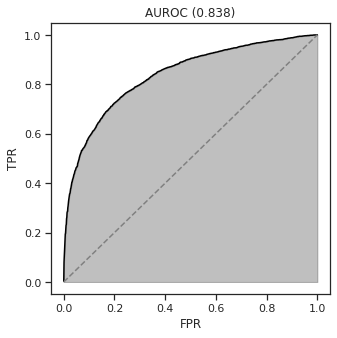

In [13]:
diag3.roc(dataset, 'sign1', save=False, plot=True)

2022-07-18 09:53:42,052 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-18 09:53:42,208 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-18 09:53:42,232 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-18 09:53:42,257 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-18 09:53:42,258 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-18 09:53:43,471 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Chosen perplexity 50
2022-07-18 09:54:36,435 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2022-07-18 09:54:36,440 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2022-07-18 09:54:36,581 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2022-07-18 09:54:37,054 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Values
2022-07-18 09:54:37,753 chemicalchecker.core.diagnostics.Diagnosis [DEBUG

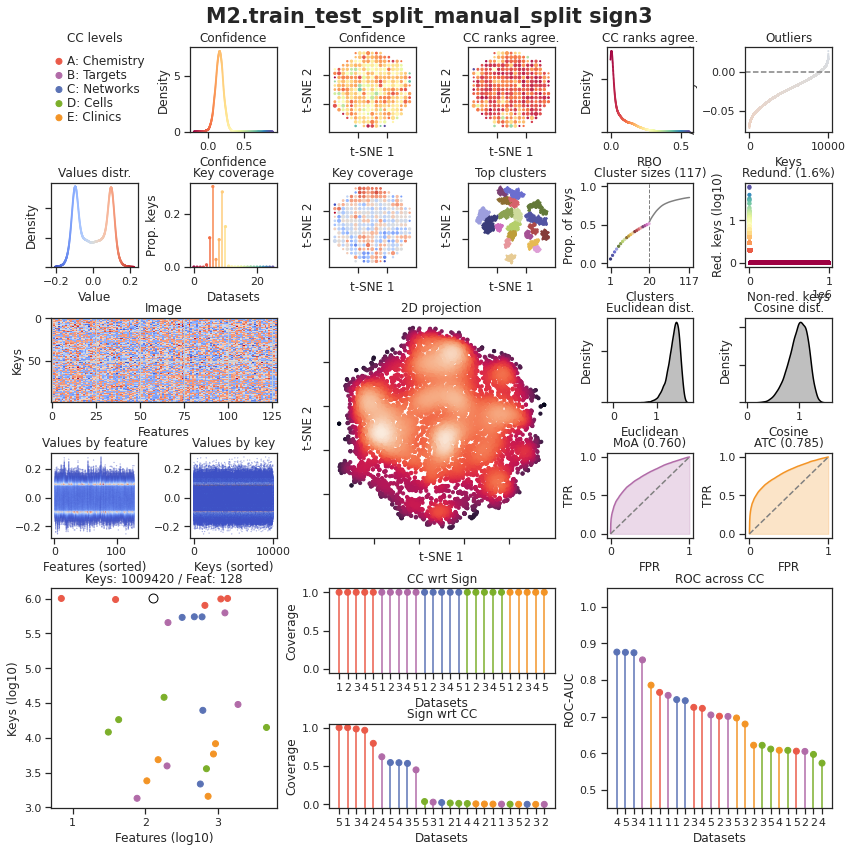

In [12]:
diag3.canvas_medium()

In [12]:
import random
random.seed(30)

X_orig, keys_orig = diag3._get_signatures(keys=df.index.values, max_keys=100000)
X_ab, keys_ab = diag3._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag3._get_signatures(keys=None, max_keys=100000)

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag3._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others), axis=None), max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag3.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

#maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
#maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(antibiotic_class_df)

2022-07-21 17:08:34,171 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 1275 keys found
2022-07-21 17:08:34,173 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-21 17:08:34,174 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1275 rows from dataset V
2022-07-21 17:08:42,735 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 245 keys found
2022-07-21 17:08:42,736 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-21 17:08:42,736 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 245 rows from dataset V
2022-07-21 17:08:45,971 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Loading signature subsample
2022-07-21 17:08:46,480 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 11463 keys found
2022-07-21 17:08:46,491 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-21 17:08:46,492 chemicalchecker.core.signature_data.DataSignature [DEBUG 

50


In [13]:
p_data

,V1,V2,compound_name,drug_class,antibiotic_class
AAAYSHMCBYUFIR-MFOYZWKCSA-N,-27.460441,-1.182925,NaN,NaN,NaN
AABLNHSZFIPOBJ-UHFFFAOYSA-N,-9.484546,-28.816931,NaN,NaN,NaN
AADBEZALNPVNKC-UHFFFAOYSA-N,25.017324,-6.561967,NaN,NaN,NaN
AADCDMQTJNYOSS-LBPRGKRZSA-N,0.220169,-26.665158,S(-)Eticlopride hydrochloride,non-drugs,other
AAFNEINEQRQMTF-LREBCSMRSA-N,-5.522099,-32.883680,Pempidine tartrate,human-targeted drugs,other
...,...,...,...,...,...
ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-15.423888,-2.590882,Furosemide,human-targeted drugs,other
ZZUFZIBKYNMSCN-UHFFFAOYSA-N,24.513855,-18.901596,NaN,NaN,NaN
ZZVGLDBDDYESAB-UHFFFAOYSA-N,35.102257,-3.429163,NaN,NaN,NaN
ZZVJFABBRJAYIU-UHFFFAOYSA-N,4.331076,3.370420,NaN,NaN,NaN


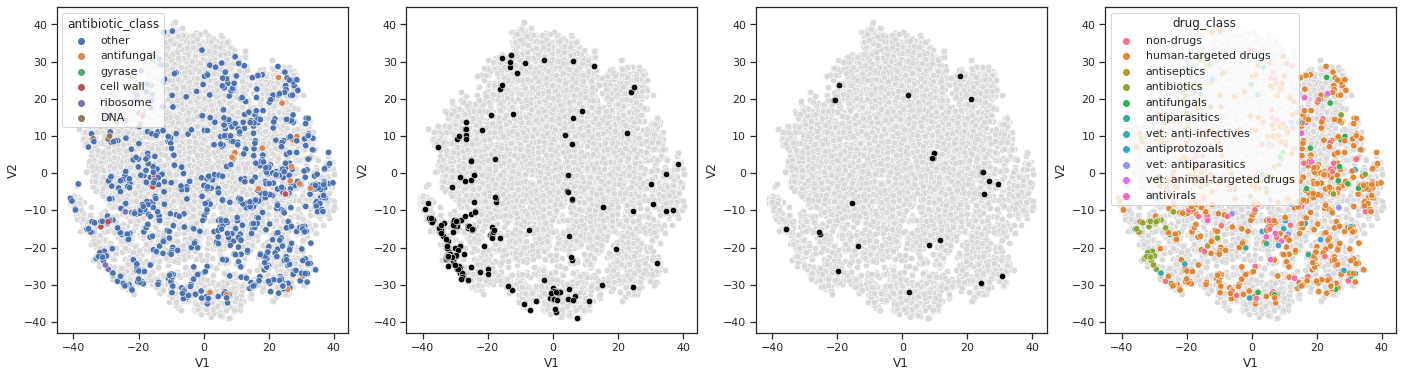

In [16]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='antibiotic_class',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='drug_class',ax=ax[3])
fig.show()

### Signature 4

In [10]:
sign4 = cc_local.signature(dataset, 'sign4')
sign4.clear_all()

2022-07-18 09:50:42,064 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign4
2022-07-18 09:50:42,119 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split_manual_split/sign4
2022-07-18 09:50:42,154 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.train_test_split_manual_split/sign4
2022-07-18 09:50:42,163 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign4
2022-07-18 09:50:42,164 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign4


In [11]:
sign4.fit_hpc(None,None,None,True,False,cpu=8, mem_by_core=8)

2022-07-18 09:50:43,326 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-18 09:50:43,327 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-18 09:50:43,336 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-18 09:50:43,336 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-18 09:50:44,031 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign4_fit_hpc.py
2022-07-18 09:50:44,031 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_bfr3nf24/job-sign4_fit_hpc.py.sh...
2022-07-18 09:50:44,034 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_bfr3nf24/job-sign4_fit_hpc.py.sh
2022-07-18 09:50:46,374 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766972


2022-07-22 16:29:14.219943: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-22 16:29:16,130 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign4
2022-07-22 16:29:16,134 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-22 16:29:16,327 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-22 16:29:16,329 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign0
2022-07-22 16:29:21,938 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.train_test_split_manual_split/sign0
2022-07-22 16:29:27,453 

<AxesSubplot:title={'center':'AUROC (0.797)'}, xlabel='FPR', ylabel='TPR'>

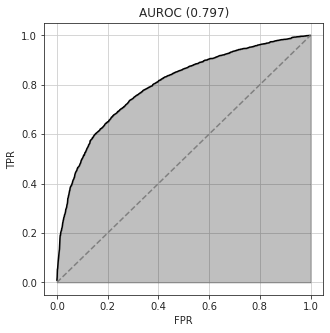

In [6]:
sign4 = cc_local.signature(dataset, 'sign4')
diag4 = sign4.diagnosis()
diag4.roc(dataset, 'sign0', save=False, plot=True)

In [10]:
compound_mapping_df = pd.read_csv('../data/anglada_girotto_cpd_name_smiles_inchikey_corrected_df.csv')

In [11]:
compound_mapping_df

,...1,compound_name_abbr,full_name,SMILES_cc,InChiKey
0,0,Streptozotocin,Streptozotocin,CN(N=O)C(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@@H](O...,ZSJLQEPLLKMAKR-GKHCUFPYSA-N
1,1,Deferoxamine mesylate,Deferoxamine mesylate,CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC...,IDDIJAWJANBQLJ-UHFFFAOYSA-N
2,2,Lithocholic acid,Lithocholic acid,C[C@H](CCC(O)=O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4...,SMEROWZSTRWXGI-HVATVPOCSA-N
3,3,Sulfamethazine sodium salt,Sulfamethazine sodium salt,[Na+].Cc1cc(C)nc([N-][S](=O)(=O)c2ccc(N)cc2)n1,NGIVTUVVBWOTNT-UHFFFAOYSA-N
4,4,"Mevalonic-D, L acid lactone","Mevalonic-D, L acid lactone",C[C@@]1(O)CCOC(=O)C1,JYVXNLLUYHCIIH-ZCFIWIBFSA-N
...,...,...,...,...,...
1337,1337,TX100,Triton X-100,CC(C)(C)CC(C)(C)c1ccc(OCCO)cc1,JYCQQPHGFMYQCF-UHFFFAOYSA-N
1338,1338,STR,Streptomycin,CN[C@H]1[C@H](O)[C@@H](O)[C@H](CO)O[C@H]1O[C@H...,UCSJYZPVAKXKNQ-HZYVHMACSA-N
1339,1339,NFL,Norfloxacin,CCN1C=C(C(O)=O)C(=O)c2cc(F)c(cc12)N3CCNCC3,OGJPXUAPXNRGGI-UHFFFAOYSA-N
1340,1340,OXTb,Oxytetracycline,O.O.CN(C)[C@H]1[C@@H]2[C@@H](O)[C@H]3C(=C(O)c4...,IMLJLCJZQLGHJS-JEKSYDDFSA-N


In [ ]:
# get sign4 values for all compounds of the original dataset
compound_mapping_df = pd.read_csv('../data/anglada_girotto_cpd_name_smiles_inchikey_corrected_df.csv')
df_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(df.index)]['SMILES_cc'].to_list()

dest_file = '../data/M2_sign4_train_test_manual_triplets_data.h5'

sign4.predict_from_smiles(df_smiles, dest_file=dest_file)

In [13]:
# save as csv file
df_h5 = DataSignature(dest_file)
sign4_df = pd.DataFrame(df_h5.get_h5_dataset('V'))
sign4_df['SMILES_cc'] = df_smiles
sign4_df = sign4_df.merge(compound_mapping_df, how='left', on='SMILES_cc')
sign4_df.to_csv('../data/M2_sign4_train_test_manual_triplets_data.csv')

2022-07-22 16:44:23,261 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V


In [22]:
import random
random.seed(30)

X_orig, keys_orig = diag4._get_signatures(keys=df.index.values, max_keys=100000)
X_ab, keys_ab = diag4._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag4._get_signatures(keys=None, max_keys=100000)

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag4._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others), axis=None), max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag4.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(antibiotic_class_df)

2022-07-22 16:58:06,303 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 1148 keys found
2022-07-22 16:58:06,305 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-22 16:58:06,306 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1148 rows from dataset V
2022-07-22 16:58:09,542 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 236 keys found
2022-07-22 16:58:09,543 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-22 16:58:09,544 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 236 rows from dataset V
2022-07-22 16:58:10,982 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 11340 keys found
2022-07-22 16:58:10,993 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-22 16:58:10,993 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 11340 rows from dataset V


50


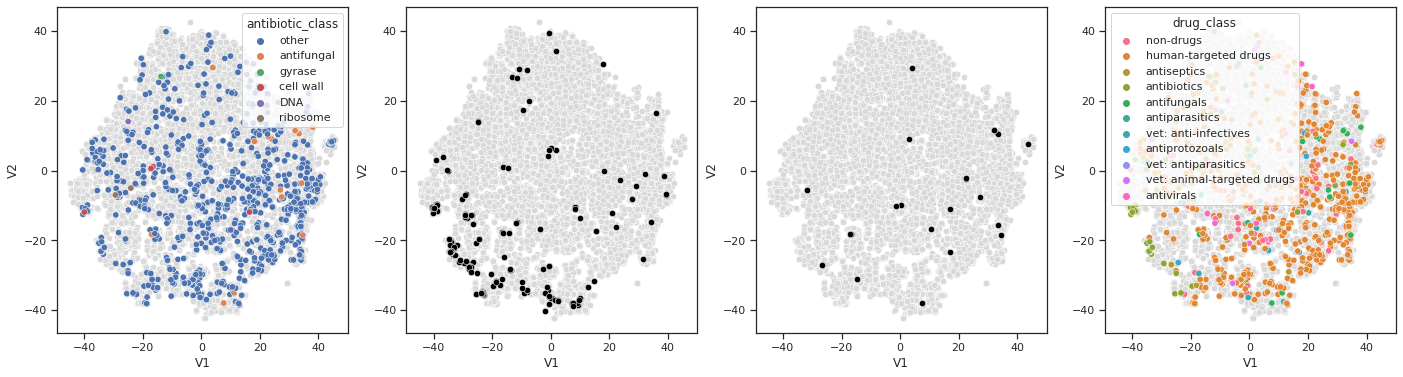

In [23]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='antibiotic_class',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='drug_class',ax=ax[3])
fig.show()